In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

df = pd.read_csv('/content/drive/MyDrive/FIAP/Machine Learning/Regressão Logística/WineQT.csv')
df['quality'] = df.apply(lambda row: 2 if row['quality'] > 6 else (1 if row['quality'] > 5 else 0), axis=1)
# df['quality'] = df.apply(lambda row: 1 if row['quality'] > 5 else 0, axis=1)
df['quality'].value_counts()


,count
quality,
0,522
1,462
2,159


In [ ]:
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,2,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,4


In [ ]:
x = df.drop('quality', axis='columns')
y = df['quality']
x_scaled = preprocessing.StandardScaler().fit(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)

# lbfgs, yes
# liblinear,no
# newton-cg,yes
# newton-cholesky,no
# sag,yes
# saga,yes

d = {'lbfgs':0, 'liblinear':0, 'newton-cg':0,  'newton-cholesky':0, 'sag':0, 'saga':0}

for k in d.keys():
  classifier = LogisticRegression(max_iter=100000, solver=k)
  classifier.fit(x_train, y_train)
  y_pred = classifier.predict(x)
  print(f"Accuracy {k}:", accuracy_score(y, y_pred))
  d[k] = accuracy_score(y, y_pred)

classifier = LogisticRegression(max_iter=100000, solver=max(d, key=d.get))
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x)
print(f"Chosen one ",max(d, key=d.get) ,":", accuracy_score(y, y_pred))
d[k] = accuracy_score(y, y_pred)

Accuracy lbfgs: 0.6386701662292213
Accuracy liblinear: 0.6307961504811899
Accuracy newton-cg: 0.6386701662292213
Accuracy newton-cholesky: 0.6334208223972003
Accuracy sag: 0.5774278215223098
Accuracy saga: 0.552930883639545
Chosen one  lbfgs : 0.6386701662292213


<Axes: >

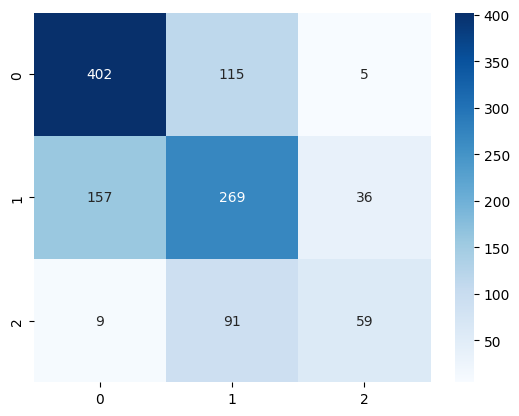

In [ ]:
y_pred = classifier.predict(x)
matrix = confusion_matrix(y, y_pred)
# sns.heatmap(matrix/np.sum(matrix), annot=True, fmt='.2%', cmap='Reds')
sns.heatmap(matrix, annot=True, fmt='d', cmap="Blues")
# matrix


In [ ]:
classifier.coef_

array([[-1.75010234e-01,  1.47290126e+00,  8.97907743e-02,
        -1.12657369e-02,  1.80051900e-02, -1.12057683e-02,
         6.60436124e-03, -4.36914365e-03,  1.56546486e-01,
        -8.86360128e-01, -9.38099441e-01, -8.62657758e-06],
       [ 3.03518057e-03, -1.83072402e-01, -6.97669902e-01,
        -3.90398694e-02,  1.39784644e-01,  2.14812851e-02,
        -4.90627342e-03,  2.44445148e-03, -4.23086496e-01,
        -4.61733760e-02,  5.66961548e-02,  1.91226270e-04],
       [ 1.71975054e-01, -1.28982886e+00,  6.07879128e-01,
         5.03056063e-02, -1.57789834e-01, -1.02755168e-02,
        -1.69808782e-03,  1.92469217e-03,  2.66540010e-01,
         9.32533504e-01,  8.81403286e-01, -1.82599700e-04]])

In [ ]:
from sklearn.feature_selection import chi2
scores, pvalues = chi2(x, y)
result = pd.DataFrame({'X':x.columns, 'pvalues':pvalues})
print(result)

                       X        pvalues
0          fixed acidity   2.625053e-02
1       volatile acidity   5.902017e-03
2            citric acid   3.830387e-03
3         residual sugar   1.132631e-01
4              chlorides   7.988831e-01
5    free sulfur dioxide   9.007360e-11
6   total sulfur dioxide  6.051368e-305
7                density   9.999288e-01
8                     pH   9.689860e-01
9              sulphates   1.628523e-01
10               alcohol   5.378960e-08
11                    Id   0.000000e+00
